In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import math
from sys import getsizeof
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
import plotly.io as pio
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.rcParams['axes.axisbelow'] = True

In [4]:
from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d, scatter3d, histo, spherical_scatter3d 

In [5]:
from mu2e import mu2e_ext_path

- Starting from where I ended yesterday...eventually make this function a script for easy reuse!

In [6]:
# import data (first prepped in python 2)
df = pd.read_pickle(mu2e_ext_path+'root/ce_OLD.pkl')
# select good events only
df = df[df['de._status'] != -1000]

In [7]:
df_sam = df.sample(500)

In [8]:
# plotting configs
units = ['mm','mm','mm','mm',]
colors = ['Greys','Greys','Greys','Greys','Viridis',]
# naming for columns
x_gen = 'demcgen_x'
y_gen = 'demcgen_y'
z_gen = 'demcgen_z'
x_ent = 'demcent_x'
y_ent = 'demcent_y'
z_ent = 'demcent_z'
x_mid = 'demcmid_x'
y_mid = 'demcmid_y'
z_mid = 'demcmid_z'
x_xit = 'demcxit_x'
y_xit = 'demcxit_y'
z_xit = 'demcxit_z'

In [9]:
def gen_event(df, n=1):
    df = df.sample(n)
    xs = df[[x_gen,x_ent,x_mid,x_xit,]].transpose().values.flatten()
    ys = df[[y_gen,y_ent,y_mid,y_xit,]].transpose().values.flatten()
    zs = df[[z_gen,z_ent,z_mid,z_xit,]].transpose().values.flatten()
    sub = [df['evtinfo._subrunid'].values[0]]*4
    evt = [df['evtinfo._eventid'].values[0]]*4
    df = pd.DataFrame()
    df['X'] = pd.Series(xs)
    df['Y'] = pd.Series(ys)
    df['Z'] = pd.Series(zs)
    df['SUBID'] = pd.Series(sub)
    df['EVTID'] = pd.Series(evt)
    return df

In [10]:
### FROM YESTERDAY'S WORK ###
# add functionality to supply gen
# pick random events and plot!
def gen_electron_plot(gen=None,linear_trace=True,inline=True,filename='ce_scatter3d_DEFAULT'):
    if type(gen) == type(None):
        gen = gen_event(df_sam)
    colors = 4*['Greys']+['Viridis',]
    #colors = 4*[[1.,'rgb(100,100,100)']]+['Viridis',]
    #colorbars = [True,False,False,False,True]
    colorbars = [False,False,False,False,True]
    X = [df_sam[x_gen],df_sam[x_ent],df_sam[x_mid],df_sam[x_xit],gen['X'],]
    Y = [df_sam[y_gen],df_sam[y_ent],df_sam[y_mid],df_sam[y_xit],gen['Y'],]
    Z = [df_sam[z_gen],df_sam[z_ent],df_sam[z_mid],df_sam[z_xit],gen['Z'],]
    #min_scale = [df_sam.demcgen_z.min()-1000]*4+[gen['Z'].min()]
    #max_scale = [df_sam.demcxit_z.max()]*4+[gen['Z'].max()]
    #min_scale = [-10000]*4+[gen['Z'].min()]
    #max_scale = [-10000]*4+[gen['Z'].max()]
    min_scale = [-10000]*4+[float(Z[-1].min())]
    max_scale = [-10000]*4+[float(Z[-1].max())]
    if type(gen) == type(None):
        title = f"Conversion e- MC, subrun{gen['SUBID'].values[0]}, event{gen['EVTID'].values[0]}:"
    else:
        title = f"Signal e- Sample Trajectory:"
    fig = scatter3d(X,Y,Z,units_list=units, colors_list=colors, colorbars_list = colorbars, min_color_list=min_scale, max_color_list=max_scale, opacity_list=list(0.4*np.ones(4))+[1], size_list = list(1.5*np.ones(4))+[4], title=title,reverse_scale=True, inline=inline,show_plot = False)
    camera = dict(
        up=dict(x=0, y=1, z=0),
        center=dict(x=0, y=0, z=0.),
        eye=dict(x=-1.8, y=0.2, z=-0.1)
    )
    fig.layout.dragmode = 'orbit'
    fig.layout.scene.camera = camera
    if linear_trace == True:
        fig.add_scatter3d(x=gen['X'],y=gen['Y'],z=gen['Z'],mode='lines')
        if inline == True:
            iplot(fig,filename=hpc_ext_path +'plots/root/'+filename)
        else:
            plot(fig,filename=hpc_ext_path + 'plots/root/'+filename)
    return fig,gen#filename=filename)

In [12]:
gen_electron_plot(inline=True);

In [54]:
gen = gen_event(df_sam.head(1))
gen_electron_plot(gen=gen,inline=True)

(Figure({
     'data': [{'marker': {'cauto': False,
                          'cmax': -10000,
                          'cmin': -10000,
                          'color': array([-4388.867 , -4344.488 , -4344.4736, ..., -4344.4062, -4211.136 ,
                                          -4011.1206], dtype=float32),
                          'colorbar': {'thickness': 20, 'title': 'demcgen_z (mm)', 'x': -0.0, 'y': 0.5},
                          'colorscale': 'Greys',
                          'opacity': 0.4,
                          'reversescale': True,
                          'showscale': False,
                          'size': 1.5},
               'mode': 'markers',
               'name': '<br>x: demcgen_x (mm)<br>y: demcgen_y (mm)<br>z: demcgen_z (mm)<br>',
               'type': 'scatter3d',
               'uid': 'd4d5a860-934e-420e-8ec5-210b8de3deb6',
               'x': array([  7.774658, -20.467285,  65.69043 , ...,  50.02661 ,  -8.116699,
                           -17.75708 ]

In [56]:
df_sam

,evtinfo._eventid,evtinfo._runid,evtinfo._subrunid,evtinfo._nprotons,de._status,de._pdg,de._nhits,de._ndof,de._nactive,de._ndouble,...,demcxit_mom,demcxit_x,demcxit_y,demcxit_z,demcxit_d0,demcxit_p0,demcxit_om,demcxit_z0,demcxit_td,evtwt
163801,2031,1002,82,1,1,11,36,31,36,16,...,103.999939,-66.028549,51.341839,1639.099976,18.709244,2.104241,0.003886,1569.506714,0.880703,1.0
353482,1728,1002,10,1,1,11,28,23,28,11,...,103.985435,192.416443,438.954895,1639.099976,26.064754,-0.171119,0.004262,981.653320,1.065351,1.0
553180,5661,1002,110,1,1,11,71,66,71,37,...,89.829102,119.054962,211.986816,1639.099976,120.642914,-1.244767,0.003993,1750.879639,0.631245,1.0
452718,1776,1002,75,1,1,11,28,23,28,11,...,104.106041,61.488316,-64.294319,1639.099976,-65.339149,1.647442,0.003719,1694.311523,0.793406,1.0
130141,3541,1002,67,1,1,11,34,29,34,15,...,104.273354,81.579895,-384.408020,1639.099976,26.209068,2.701778,0.004137,2069.003174,1.011226,1.0
548080,2258,1002,109,1,1,11,42,37,42,19,...,102.672607,-249.268356,468.151672,1639.099976,8.077068,0.275235,0.003738,2200.539551,0.775245,1.0
297308,3870,1002,153,1,1,11,37,32,37,12,...,102.171494,-271.014618,341.392609,1639.099976,42.124985,0.030825,0.003788,2002.466797,0.792804,1.0
275119,5195,1002,147,1,1,11,28,23,28,9,...,104.263412,305.560608,105.383171,1639.099976,55.691177,-1.968197,0.004590,2016.813477,1.220336,1.0
277770,2344,1002,148,1,1,11,54,49,54,22,...,101.510658,-42.103550,-53.998093,1639.099976,68.338615,2.423541,0.003767,1642.031128,0.767561,1.0
532981,2797,1002,105,1,1,11,53,48,53,23,...,102.132477,365.767120,483.603973,1639.099976,65.858566,-0.760008,0.003668,2210.109131,0.724851,1.0


In [55]:
gen

,X,Y,Z,SUBID,EVTID
0,7.774658,-47.708054,-4388.867188,82,2031
1,-160.198166,-392.951904,-1631.119995,82,2031
2,26.514584,-163.811798,10.090000,82,2031
3,-66.028549,51.341839,1639.099976,82,2031


In [14]:
ifile = mu2e_ext_path+'root/datadump_verbose_01.log'

In [15]:
with open(ifile) as f:
    data = f.read()

In [16]:
lines = data.splitlines()

In [17]:
genParticle_header = lines[17].split()
genParticle = lines[18].split()

In [18]:
genParticle

['0',
 '11',
 '-3935.3',
 '-15.5',
 '6004.4',
 '91.2',
 '-40.8',
 '32.1',
 '265.4',
 '0.0',
 'CeEndpoint']

In [19]:
genParticle_header

['ind', 'pdgId', 'Position', 'Momentum', 'time', 'ptime', 'name']

In [20]:
start_pos = genParticle[2:5]
start_mom = genParticle[5:8]

In [21]:
start_mom

['91.2', '-40.8', '32.1']

In [22]:
stepMC_absorber = lines[33:35]

In [23]:
stepMC_absorber

['   0        0       0    0.10653    0.00000      -4098.692    228.233   7262.793   104.847  275.548  Transportation',
 '   1        0       0    0.12923    0.00000      -3618.230     89.604   7686.970   104.741  278.226  Transportation']

In [24]:
store = False
ProductPrint = {}
for line in lines:
    if "ProductPrint mu2e" in line:
        key = line.split()[-1]
        ProductPrint[key] = []
        store = True
    if line == '':
        store = False
    if store:
        ProductPrint[key].append(line)

In [25]:
ProductPrint

{'mu2e::GenParticles_compressDigiMCs__CeEndpoint': ['ProductPrint mu2e::GenParticles_compressDigiMCs__CeEndpoint',
  'GenParticleCollection has 1 particles',
  'ind   pdgId            Position                     Momentum            time   ptime            name',
  '   0    11    -3935.3    -15.5   6004.4       91.2    -40.8     32.1   265.4     0.0    CeEndpoint'],
 'mu2e::SimParticlemv_compressDigiMCs__CeEndpoint': ['ProductPrint mu2e::SimParticlemv_compressDigiMCs__CeEndpoint',
  'SimParticleCollection has 4 particles',
  'ind      key    parent  pdgId       Start  Position            P            End Position               P     vol   process',
  '   0       0      -1       11  -3935.3    -15.5   6004.4     105.0     -3793.7    493.8  11889.2       0.0   2760   eIoni',
  '   3       3       0       22  -3747.3    488.1  11857.1      10.8     -3869.3    546.2  11961.0       0.0   2760   conv'],
 'mu2e::StepPointMCs_compressDigiMCs_CRV_CeEndpoint': ['ProductPrint mu2e::StepPointMCs_c

In [26]:
stepMCs = []
for key, val in ProductPrint.items():
    if 'StepPointMCs' in key:
        headers = val[2].split()
        stepMCs.append([line.split() for line in val[3:]])
stepMCs = [item for sublist in stepMCs for item in sublist]

In [27]:
stepMCs

[['0',
  '0',
  '0',
  '0.10653',
  '0.00000',
  '-4098.692',
  '228.233',
  '7262.793',
  '104.847',
  '275.548',
  'Transportation'],
 ['1',
  '0',
  '0',
  '0.12923',
  '0.00000',
  '-3618.230',
  '89.604',
  '7686.970',
  '104.741',
  '278.226',
  'Transportation'],
 ['0',
  '0',
  '8353',
  '0.00037',
  '0.00000',
  '15.903',
  '506.030',
  '-818.853',
  '104.507',
  '287.749',
  'Transportation'],
 ['1',
  '0',
  '8353',
  '0.00037',
  '0.00000',
  '15.903',
  '506.030',
  '-818.853',
  '104.507',
  '287.749',
  'Transportation'],
 ['2',
  '0',
  '8353',
  '0.00037',
  '0.00000',
  '15.903',
  '506.030',
  '-818.853',
  '104.507',
  '287.749',
  'Transportation'],
 ['3',
  '0',
  '8354',
  '0.00089',
  '0.00000',
  '21.441',
  '506.672',
  '-822.995',
  '104.527',
  '287.726',
  'Transportation'],
 ['4',
  '0',
  '8354',
  '0.00089',
  '0.00000',
  '21.441',
  '506.672',
  '-822.995',
  '104.527',
  '287.726',
  'Transportation'],
 ['5',
  '0',
  '8354',
  '0.00089',
  '0.00000',

In [28]:
headers.insert(6,'Z')
headers.insert(6,'Y')
headers.insert(6,'X')

In [29]:
headers.remove('Position')

In [30]:
headers

['ind',
 'parent',
 'vol',
 'eDep',
 'noIonEDep',
 'X',
 'Y',
 'Z',
 'P',
 'time',
 'endProc']

In [31]:
gen_stepMCs = pd.DataFrame(stepMCs, columns=headers)

In [32]:
#gen_stepMCs.sort_values(by=['time'])

In [33]:
gen_stepMCs['EVTID'] = 0
gen_stepMCs['SUBID'] = 0

In [34]:
#type(None)

In [35]:
gen_stepMCs.drop_duplicates(subset=['X','Y','Z'], inplace=True)

In [36]:
#gen_stepMCs.infer_objects().dtypes

In [37]:
gen_stepMCs['X'] = pd.to_numeric(gen_stepMCs.X)#(gen=gen_stepMCs,inline=True)
gen_stepMCs['Y'] = pd.to_numeric(gen_stepMCs.Y)
gen_stepMCs['Z'] = pd.to_numeric(gen_stepMCs.Z)

In [38]:
#type(None) == type(None)

In [39]:
#gen_electron_plot(gen=gen_stepMCs,inline=True)

In [40]:
# fix non-offset vals
#gen_stepMCs['Z'] = pd.Series([row.Z if row.X > -2000 else row.Z-10035.0 for row in gen_stepMCs.itertuples()]).values
gen_stepMCs['Z'] = pd.Series([row.Z if row.X > -2000 else row.Z-10200.0 for row in gen_stepMCs.itertuples()]).values
gen_stepMCs['X'] = pd.Series([row.X if row.X > -2000 else row.X+3904. for row in gen_stepMCs.itertuples()]).values

In [41]:
#gen_electron_plot(gen=gen_stepMCs.sort_values(by='time'),inline=True)

In [42]:
# adding in birth by hand...
#dfGen = pd.DataFrame({'ind':[0],'parent':[0],'vol':[0],'eDep':[0],'noIonEDep':[0],'X':[-3935.3+3904.0],'Y':[-15.5],'Z':[6004.4-10035.0],'P':[float((91.2**2+(-40.8)**2+32.1**2)**(1/2))],'time':[float(265.4)],'endProc':['GenParticle'],'EVTID':[0],'SUBID':[0]})
dfGen = pd.DataFrame({'ind':[0],'parent':[0],'vol':[0],'eDep':[0],'noIonEDep':[0],'X':[-3935.3+3904.0],'Y':[-15.5],'Z':[6004.4-10200.0],'P':[float((91.2**2+(-40.8)**2+32.1**2)**(1/2))],'time':[float(265.4)],'endProc':['GenParticle'],'EVTID':[0],'SUBID':[0]})
gen_stepMCs = gen_stepMCs.append(dfGen,ignore_index=True)

In [43]:
#gen_stepMCs

In [44]:
#gen_electron_plot(gen=gen_stepMCs.sort_values(by='time'),inline=True)

In [45]:
gen_stepMCs['time'] = pd.to_numeric(gen_stepMCs.time)
gen_stepMCs['P'] = pd.to_numeric(gen_stepMCs.P)

In [46]:
gen_stepMCs

,ind,parent,vol,eDep,noIonEDep,X,Y,Z,P,time,endProc,EVTID,SUBID
0,0,0,0,0.10653,0.00000,-194.692,228.233,-2937.207,104.847000,275.548,Transportation,0,0
1,1,0,0,0.12923,0.00000,285.770,89.604,-2513.030,104.741000,278.226,Transportation,0,0
2,0,0,8353,0.00037,0.00000,15.903,506.030,-818.853,104.507000,287.749,Transportation,0,0
3,3,0,8354,0.00089,0.00000,21.441,506.672,-822.995,104.527000,287.726,Transportation,0,0
4,6,0,9362,0.00054,0.00000,-80.540,475.724,-743.111,104.457000,288.172,Transportation,0,0
5,9,0,9364,0.00041,0.00000,-77.544,477.297,-745.633,104.479000,288.158,Transportation,0,0
6,12,0,21663,0.00105,0.00000,239.600,429.850,292.446,104.408000,293.922,Transportation,0,0
7,15,0,21664,0.00049,0.00000,234.273,434.841,297.924,104.398000,293.953,Transportation,0,0
8,18,0,21789,0.00036,0.00000,254.098,414.627,276.700,104.422000,293.834,Transportation,0,0
9,21,0,24733,0.00070,0.00000,-107.784,460.881,574.668,104.304000,295.493,Transportation,0,0


In [58]:
#pkl.dump(gen_stepMCs,open(mu2e_ext_path+"mc_steps_offline_datadump_verbose_01.p",'wb'))
gen_stepMCs.to_pickle(mu2e_ext_path+"mc_steps_offline_datadump_verbose_01.p")

In [47]:
fig,gen = gen_electron_plot(gen=gen_stepMCs.sort_values(by='time'),inline=False)

/home/ckampa/anaconda3/envs/Mu2E/lib/python3.7/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `/home/ckampa/Coding/hallprobecalib_extras/plots/root/ce_scatter3d_DEFAULT` didn't end with .html. Adding .html to the end of your file.



# Takeaway: still too sparse!
- Next step: get trajectory code up and running, and swim 10,000 electrons through!

## Update 4/29/19
-comparing trajectory test to MC fine grained.

In [48]:
import pickle as pkl

In [51]:
# Was in a hurry so had to adjust pickle a bit and resave.
'''
#list_traj = pkl.load(open(mu2e_ext_path+'trajectory_01.p','rb'))
list_traj = pkl.load(open(mu2e_ext_path+'trajectory_01_lessmom.p','rb'))

list_traj

X = list_traj[0]

df = pd.DataFrame(X,columns=['X','Y','Z','Vx','Vy','Vz'])

df['t'] = list_traj[1]

df

pkl.dump(df,open(mu2e_ext_path+'trajectory_01_lessmom.p','wb'))
'''

"\n#list_traj = pkl.load(open(mu2e_ext_path+'trajectory_01.p','rb'))\nlist_traj = pkl.load(open(mu2e_ext_path+'trajectory_01_lessmom.p','rb'))\n\nlist_traj\n\nX = list_traj[0]\n\ndf = pd.DataFrame(X,columns=['X','Y','Z','Vx','Vy','Vz'])\n\ndf['t'] = list_traj[1]\n\ndf\n\npkl.dump(df,open(mu2e_ext_path+'trajectory_01_lessmom.p','wb'))\n"

In [49]:
df = pkl.load(open(mu2e_ext_path+'trajectory_01.p','rb'))
df2 = pkl.load(open(mu2e_ext_path+'trajectory_01_lessmom.p','rb'))

In [50]:
df

,X,Y,Z,Vx,Vy,Vz,t
0,-31.300000,-15.500000,6004.400000,2.605359e+11,-1.165555e+11,9.170179e+10,0.000000e+00
1,-28.686811,-16.649598,6005.317276,2.619646e+11,-1.133033e+11,9.170764e+10,1.000250e-11
2,-26.059536,-17.766581,6006.234612,2.633524e+11,-1.100341e+11,9.171377e+10,2.000500e-11
3,-23.418587,-18.850783,6007.152011,2.646989e+11,-1.067487e+11,9.172020e+10,3.000750e-11
4,-20.764375,-19.902043,6008.069476,2.660041e+11,-1.034476e+11,9.172693e+10,4.001000e-11
5,-18.097316,-20.920207,6008.987009,2.672677e+11,-1.001313e+11,9.173393e+10,5.001250e-11
6,-15.417826,-21.905125,6009.904614,2.684896e+11,-9.680028e+10,9.174119e+10,6.001500e-11
7,-12.726323,-22.856655,6010.822293,2.696696e+11,-9.345523e+10,9.174865e+10,7.001750e-11
8,-10.023227,-23.774658,6011.740047,2.708076e+11,-9.009664e+10,9.175626e+10,8.002001e-11
9,-7.308959,-24.659001,6012.657877,2.719035e+11,-8.672506e+10,9.176393e+10,9.002251e-11


In [51]:
df2

,X,Y,Z,Vx,Vy,Vz,t
0,-31.300000,-15.500000,6004.400000,2.606949e+11,-1.156726e+11,9.236542e+10,0.000000e+00
1,-28.685225,-16.640639,6005.323914,2.621227e+11,-1.123947e+11,9.237129e+10,1.000250e-11
2,-26.056376,-17.748406,6006.247889,2.635089e+11,-1.091000e+11,9.237745e+10,2.000500e-11
3,-23.413870,-18.823135,6007.171926,2.648533e+11,-1.057889e+11,9.238391e+10,3.000750e-11
4,-20.758127,-19.864665,6008.096030,2.661557e+11,-1.024619e+11,9.239066e+10,4.001000e-11
5,-18.089567,-20.872841,6009.020202,2.674160e+11,-9.911972e+10,9.239770e+10,5.001250e-11
6,-15.408613,-21.847512,6009.944447,2.686339e+11,-9.576282e+10,9.240500e+10,6.001500e-11
7,-12.715690,-22.788535,6010.868765,2.698093e+11,-9.239180e+10,9.241251e+10,7.001750e-11
8,-10.011223,-23.695771,6011.793160,2.709420e+11,-8.900721e+10,9.242016e+10,8.002001e-11
9,-7.295638,-24.569086,6012.717631,2.720321e+11,-8.560962e+10,9.242788e+10,9.002251e-11


In [52]:
# finally, transform z coord to tracker coords (tracker mid sets z = 0)
df['Z'] = df['Z'] - 10200. # wrong offset in Mu2e docdb
df2['Z'] = df2['Z'] - 10200. # wrong offset in Mu2e docdb
#df['Z'] = df['Z'] - 10035.

In [53]:
fig.add_scatter3d(x=df['X'],y=df['Y'],z=df['Z'],mode='lines')
fig.add_scatter3d(x=df2['X'],y=df2['Y'],z=df2['Z'],mode='lines')

Scatter3d({
    'mode': 'lines',
    'uid': 'a75a2b3f-24ae-4dc1-ab42-97dbf955e49c',
    'x': array([-31.3       , -28.68522474, -26.0563757 , ..., 285.08027012,
                287.08569626, 289.07398078]),
    'y': array([-15.5       , -16.64063891, -17.74840622, ..., -36.92327716,
                -34.94922188, -32.95788784]),
    'z': array([-4195.6       , -4194.67608574, -4193.75211133, ...,  -176.60631744,
                 -175.5703841 ,  -174.53447893])
})

In [57]:
plot(fig,filename='/home/ckampa/Coding/hallprobecalib_extras/plots/root/traj_comparison_01_lessmom.html')

'file:///home/ckampa/Coding/hallprobecalib_extras/plots/root/traj_comparison_01_lessmom.html'

Looks pretty bad after the first turn...let's try to find out more.

In [93]:
# remove offset from time
gen_stepMCs['time'] = (gen_stepMCs['time'] - gen_stepMCs['time'].min())*1e-9

In [94]:
# and remove end entries
#gen_stepMCs = gen_stepMCs[0:14]
#gen_stepMCs = gen_stepMCs[~15:-1]
#gen_stepMCs = pd.concat([gen_stepMCs.loc[:14],gen_stepMCs.loc[[24]]]).sort_values(by='time')
gen_stepMCs = gen_stepMCs.sort_values(by='time')

In [95]:
gen_stepMCs

,ind,parent,vol,eDep,noIonEDep,X,Y,Z,P,time,endProc,EVTID,SUBID
24,0,0,0,0,0,-31.300,-15.500,-4195.600,104.940412,0.000000e+00,GenParticle,0,0
14,0,0,10,0.00000,0.00000,108.688,429.463,-3924.000,104.847000,2.797000e-09,Transportation,0,0
0,0,0,0,0.10653,0.00000,-194.692,228.233,-2937.207,104.847000,1.014800e-08,Transportation,0,0
1,1,0,0,0.12923,0.00000,285.770,89.604,-2513.030,104.741000,1.282600e-08,Transportation,0,0
15,1,0,13,0.00000,0.00000,-139.326,41.416,-1660.120,104.612000,1.778100e-08,Transportation,0,0
16,2,0,23,0.00000,0.00000,321.209,197.138,-1216.013,104.612000,2.027500e-08,Transportation,0,0
3,3,0,8354,0.00089,0.00000,21.441,506.672,-822.995,104.527000,2.232600e-08,Transportation,0,0
2,0,0,8353,0.00037,0.00000,15.903,506.030,-818.853,104.507000,2.234900e-08,Transportation,0,0
5,9,0,9364,0.00041,0.00000,-77.544,477.297,-745.633,104.479000,2.275800e-08,Transportation,0,0
4,6,0,9362,0.00054,0.00000,-80.540,475.724,-743.111,104.457000,2.277200e-08,Transportation,0,0


<IPython.core.display.Javascript object>


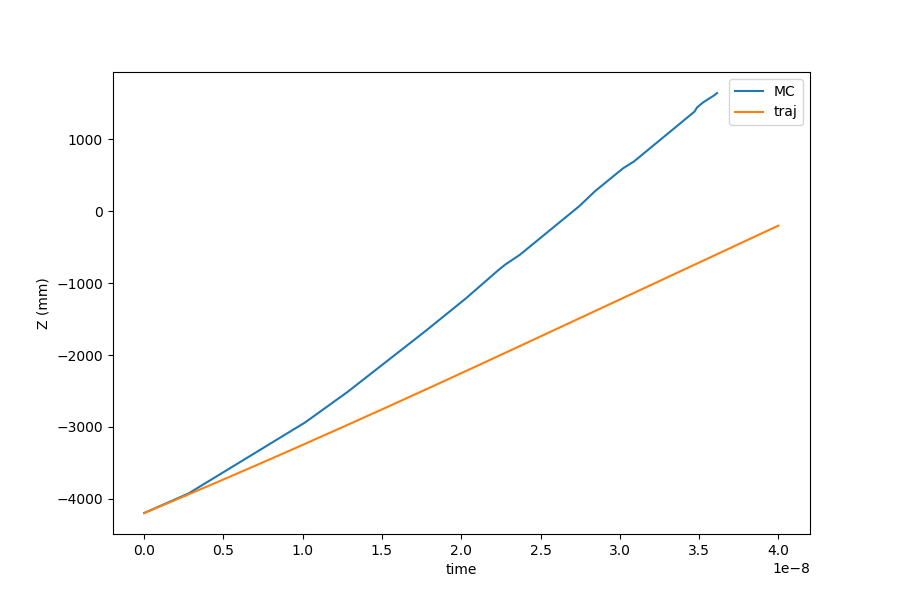

In [101]:
plt.plot(gen_stepMCs.time,gen_stepMCs.Z,label='MC')
plt.plot(df.t,df.Z,label='traj')
plt.xlabel('time')
plt.ylabel('Z (mm)')
plt.legend()

<IPython.core.display.Javascript object>


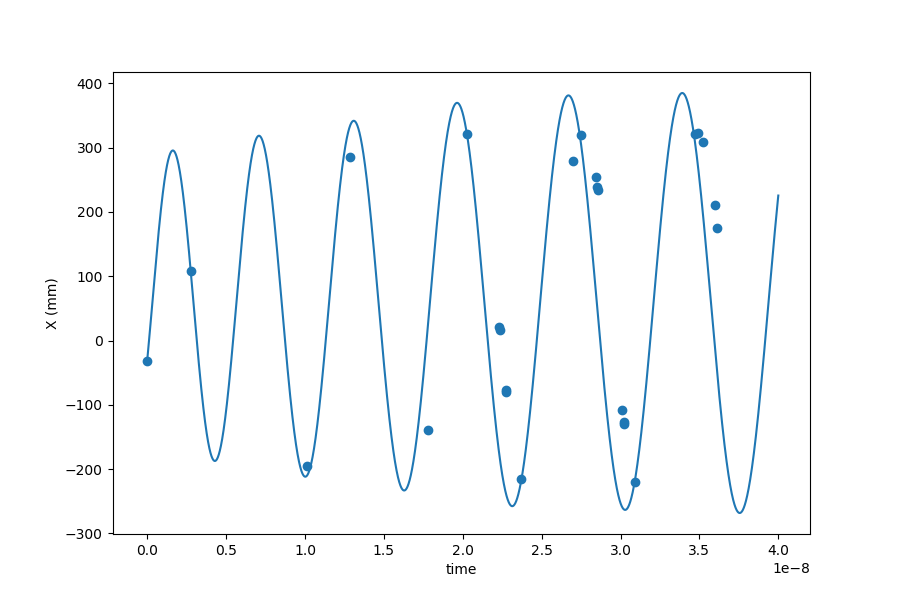

Text(0, 0.5, 'X (mm)')

In [102]:
plt.figure()
#plt.plot(gen_stepMCs.time,gen_stepMCs.X,label='MC')
plt.plot(df.t,df.X,label='traj')
plt.scatter(gen_stepMCs.time,gen_stepMCs.X,label='MC')
plt.xlabel('time')
plt.ylabel('X (mm)')
#plt.show()
#plt.legend()

<IPython.core.display.Javascript object>


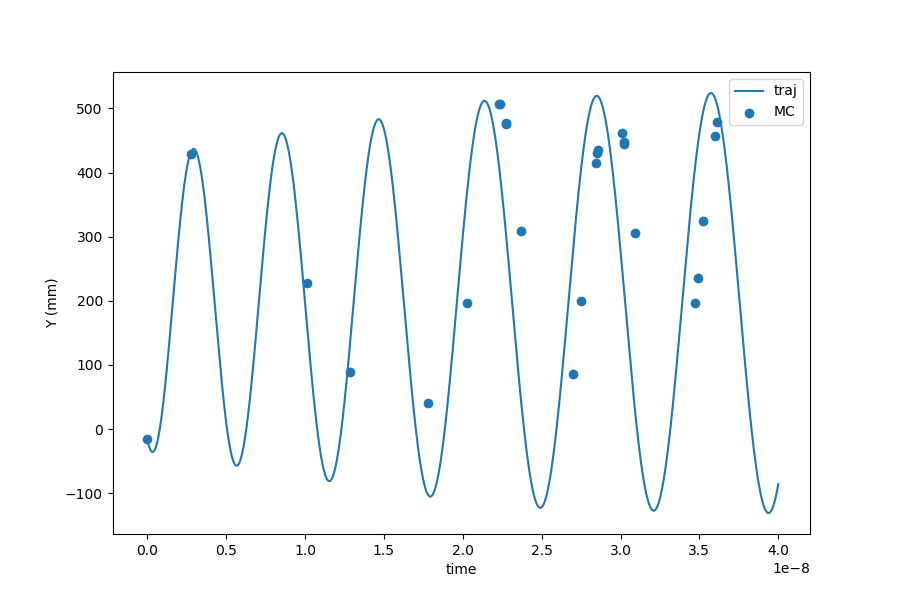

In [103]:
plt.figure()
#plt.plot(gen_stepMCs.time,gen_stepMCs.Y,label='MC')
plt.plot(df.t,df.Y,label='traj')
plt.scatter(gen_stepMCs.time,gen_stepMCs.Y,label='MC')
plt.xlabel('time')
plt.ylabel('Y (mm)')
plt.legend()

## 06-04-19 More plots
- Standardize this later

In [4]:
import pickle as pkl
from mu2e import mu2e_ext_path

In [29]:
df_init = pkl.load(open(mu2e_ext_path+'trajectory/traj.run03.df.init.p','rb'))
df = pkl.load(open(mu2e_ext_path+'trajectory/traj.run03.df.data.p','rb'))

In [27]:
df.columns

Index(['X', 'Y', 'Z', 'Vx', 'Vy', 'Vz', 'time', 'event', 'E0', 'EF', 'run',
       'particle'],
      dtype='object')

In [30]:
df_init

,X0,Y0,Z0,Phi0,CosTheta0,Theta0,Px0,Py0,Pz0,Pt0,run,event,particle
0,-14.647705,37.616524,5899.977539,1.099080,0.143399,1.426901,47.220498,92.566266,15.056922,103.914817,3,0,0
1,23.620117,23.873680,5722.189941,6.090903,0.494710,1.053295,89.569399,-17.438048,51.944559,91.251098,3,1,1
2,-9.940674,66.988113,5766.657715,1.065133,0.239092,1.329366,49.385568,89.195414,25.104658,101.954677,3,2,2
3,38.080566,1.296604,6100.037109,2.087748,0.675679,0.828911,-38.256335,67.291008,70.946269,77.405600,3,3,3
4,34.759766,3.226178,5566.687012,1.108421,0.643033,0.872344,35.870254,71.969286,67.518492,80.413016,3,4,4
5,-28.667969,-36.301380,5811.079590,6.026849,-0.614701,2.232804,80.113697,-20.997954,-64.543641,82.819795,3,5,5
6,66.123047,25.369076,5722.238770,4.664505,-0.348496,1.926763,-4.710785,-98.304765,-36.592098,98.417571,3,6,6
7,53.149902,33.059135,5500.024414,4.035997,-0.342071,1.919917,-61.763168,-76.943125,-35.917496,98.665766,3,7,7
8,9.153076,35.646210,5944.477539,0.452865,-0.961317,2.862540,26.006304,12.654490,-100.938278,28.921687,3,8,8
9,-11.272949,20.334005,5611.120605,1.557317,0.615467,0.907818,1.115498,82.749568,64.624026,82.757086,3,9,9


In [28]:
df

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,run,particle
0,-14.647705,37.616524,5899.977539,1.348208e+11,2.642890e+11,4.298951e+10,0.000000e+00,0,105.001243,109.435210,3,0
1,-13.315936,40.268547,5900.407514,1.314621e+11,2.659765e+11,4.298407e+10,1.000250e-11,0,105.001243,109.435210,3,0
2,-12.017866,42.937235,5900.837437,1.280827e+11,2.676210e+11,4.297897e+10,2.000500e-11,0,105.001243,109.435210,3,0
3,-10.753699,45.622158,5901.267310,1.246832e+11,2.692224e+11,4.297419e+10,3.000750e-11,0,105.001243,109.435210,3,0
4,-9.523634,48.322881,5901.697136,1.212641e+11,2.707804e+11,4.296972e+10,4.001000e-11,0,105.001243,109.435210,3,0
5,-8.327865,51.038970,5902.126920,1.178259e+11,2.722947e+11,4.296554e+10,5.001250e-11,0,105.001243,109.435210,3,0
6,-7.166579,53.769987,5902.556663,1.143693e+11,2.737651e+11,4.296164e+10,6.001500e-11,0,105.001243,109.435210,3,0
7,-6.039957,56.515491,5902.986368,1.108947e+11,2.751915e+11,4.295800e+10,7.001750e-11,0,105.001243,109.435210,3,0
8,-4.948178,59.275041,5903.416039,1.074028e+11,2.765735e+11,4.295462e+10,8.002001e-11,0,105.001243,109.435210,3,0
9,-3.891410,62.048193,5903.845676,1.038941e+11,2.779111e+11,4.295147e+10,9.002251e-11,0,105.001243,109.435210,3,0


In [52]:
sample = df.query("event == 27").reset_index(drop=True)

In [41]:
sample

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,run,particle
0,-35.523682,-56.483265,5677.820312,-2.354896e+10,1.825682e+11,2.366172e+11,0.000000e+00,27,105.001243,105.005779,3,27
1,-35.771276,-54.658714,5680.187060,-2.595665e+10,1.822456e+11,2.366140e+11,1.000250e-11,27,105.001243,105.005779,3,27
2,-36.042926,-52.837547,5682.553776,-2.835883e+10,1.818915e+11,2.366108e+11,2.000500e-11,27,105.001243,105.005779,3,27
3,-36.338574,-51.020079,5684.920459,-3.075509e+10,1.815061e+11,2.366074e+11,3.000750e-11,27,105.001243,105.005779,3,27
4,-36.658160,-49.206622,5687.287107,-3.314503e+10,1.810894e+11,2.366039e+11,4.001000e-11,27,105.001243,105.005779,3,27
5,-37.001618,-47.397489,5689.653720,-3.552822e+10,1.806417e+11,2.366003e+11,5.001250e-11,27,105.001243,105.005779,3,27
6,-37.368878,-45.592988,5692.020297,-3.790426e+10,1.801630e+11,2.365966e+11,6.001500e-11,27,105.001243,105.005779,3,27
7,-37.759867,-43.793431,5694.386836,-4.027274e+10,1.796534e+11,2.365928e+11,7.001750e-11,27,105.001243,105.005779,3,27
8,-38.174508,-41.999125,5696.753336,-4.263325e+10,1.791131e+11,2.365889e+11,8.002001e-11,27,105.001243,105.005779,3,27
9,-38.612718,-40.210375,5699.119796,-4.498539e+10,1.785422e+11,2.365848e+11,9.002251e-11,27,105.001243,105.005779,3,27


In [53]:
sample = sample.iloc[::20, :]

In [43]:
sample

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,run,particle
0,-35.523682,-56.483265,5677.820312,-2.354896e+10,1.825682e+11,2.366172e+11,0.000000e+00,27,105.001243,105.005779,3,27
20,-44.961230,-20.987153,5725.147964,-7.019253e+10,1.702868e+11,2.365350e+11,2.000500e-10,27,105.001243,105.005779,3,27
40,-63.261970,10.886972,5772.457831,-1.116711e+11,1.466077e+11,2.364512e+11,4.001000e-10,27,105.001243,105.005779,3,27
60,-89.120587,37.031760,5819.754970,-1.453681e+11,1.133688e+11,2.364086e+11,6.001500e-10,27,105.001243,105.005779,3,27
80,-120.770747,55.768976,5867.047115,-1.692961e+11,7.299104e+10,2.363991e+11,8.002001e-10,27,105.001243,105.005779,3,27
100,-156.116714,65.944948,5914.339799,-1.821638e+11,2.826174e+10,2.364128e+11,1.000250e-09,27,105.001243,105.005779,3,27
120,-192.879475,66.982932,5961.637049,-1.834345e+11,-1.787199e+10,2.364440e+11,1.200300e-09,27,105.001243,105.005779,3,27
140,-228.748164,58.895338,6008.941985,-1.733210e+11,-6.249884e+10,2.364891e+11,1.400350e-09,27,105.001243,105.005779,3,27
160,-261.525238,42.258217,6056.257084,-1.527304e+11,-1.029231e+11,2.365452e+11,1.600400e-09,27,105.001243,105.005779,3,27
180,-289.256228,18.152339,6103.584308,-1.231670e+11,-1.368174e+11,2.366100e+11,1.800450e-09,27,105.001243,105.005779,3,27


In [54]:
sample['Z'] = sample['Z'] - 10041.

In [55]:
fig,_ = gen_electron_plot(gen=sample,inline=True)

In [63]:
fig.layout.title = f"Signal e- Sample Trajectory"
fig.layout.showlegend = False

In [64]:
plot(fig,filename='/home/ckampa/Coding/hallprobecalib_extras/plots/root/sample_trajectory.html')

'file:///home/ckampa/Coding/hallprobecalib_extras/plots/root/sample_trajectory.html'

In [65]:
pio.write_image(fig,'/home/ckampa/Coding/hallprobecalib_extras/plots/root/sample_trajectory.pdf')